# Prepared By Aritra, for Friends



## IMPORTS

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

## Defining the expected function

In [2]:
def func2(x, a, b): # This is a straight line
    return a*(np.cos(x*b*np.pi/180))**2

def func(x, m, c): # This is a straight line
    return m*x + c

## Data

```python
# EXAMPLE
xs = [1, 2, 3, 4, 5, 6, 7] # x data
ys = [1.2, 1.9, 3, 4.2, 4.8, 5.7, 7] # y data
```



In [3]:
# Fill the next two lines
# xs = [0.985147863, 0.992403877, 0.995134034, 0.980630848, 0.96984631, 0.924024048, 0.671010072, 0.447735768, 0.206107374, 0.085481214, 0.036408073, 0.014852137, 3.75247e-33, 0.007596123, 0.058526204, 0.235040368, 0.379039052, 0.719185573, 0.821393805, 0.914518786, 0.985147863, 0.997260948, 0.997260948, 0.963591927, 0.821393805, 0.637818678, 0.296631678, 0.085481214, 0.043227271, 0.014852137, 3.37722e-32, 0.043227271, 0.152670815, 0.552264232, 0.719185573, 0.894005377, 0.914518786, 0.949397023, 0.985147863, 1] # x data
# ys = [265.78, 269.66, 264.81, 263.84, 258.99, 234.74, 165.87, 111.55, 50.44, 19.4, 4.85, 0.97, 0, 3.88, 24.25, 73.72, 115.43, 203.7, 235.71, 259.96, 273.54, 275.48, 274.51, 261.9, 212.43, 164.9, 72.75, 13.58, 7.76, 0.97, 0, 8.73, 54.32, 169.75, 223.1, 263.84, 275.48, 279.36, 287.12, 303.61] # y data
# ys = [546, 577, 579, 503, 435] # y data
# remember: length of xs and ys should be equal (due to obvious reasons)

In [4]:
data = pd.read_csv("../images/a.csv")
xs = data[r'Corrected Position of Analyser $(\theta)(degree)$'].to_numpy()
ys = data[r"Current (I) $\mu A$"].to_numpy()

In [5]:
data.keys()

Index(['Sl. No', 'Angular Position of Analyser $(\theta)(degree)$',
       'Corrected Position of Analyser $(\theta)(degree)$', '$(\cos\theta)^2$',
       'Current (I) $\mu A$'],
      dtype='object')

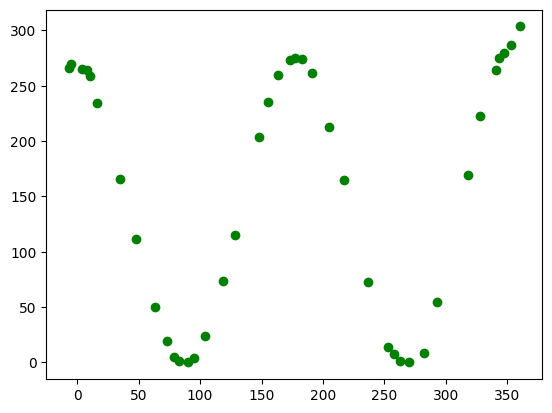

In [6]:
plt.plot(xs, ys, 'go') 

## Actual Curve - Fitting occurs in the next code cell
### Input: 
The curve_fit() function takes the first argument as the function name, next it takes the x-data and the y-data, finally we have an optional argument the "Guess" values, in this case we should have given a list of 2 numbers....

### Output:
This function returns two things,

1. popt (a list of two numbers here) they correspond to the values of the constants used in the defined function
2. pcov (a n*n matrix here n = 2) we get the error from this. We find the **square root of the diagonal elements** to find the error. The elements other than the diagonal elements are unimportant for us because the two constants are independent of each other.

###  [Learn more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [7]:
popt, pcov = curve_fit(func2, xs, ys, [276,0.0177])

C:\Users\amukh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


## Showing Results

In [8]:
# func2(xFit, popt[0], popt[1])

If the Equation is y = mx + c
For the best fit curve:
    m = 156.267 ± inf
    c = -0.0 ± inf

The curve looks like:


Text(0, 0.5, 'Current (I) $\\mu A$')

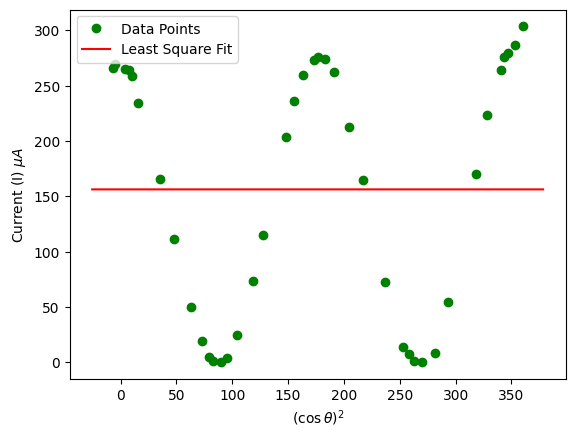

In [9]:
# RESULT OUPUT
text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
text += f"    m = {round(popt[0], 3)} ± {round((pcov[0][0])**0.5, 3)}\n"
text += f"    c = {round(popt[1], 3)} ± {round((pcov[1][1])**0.5, 3)}\n"
print(text)
print("The curve looks like:")

# Just automating some stuffs....
span = max(xs) - min(xs)
a = 0.05 # This variable stores the amount of free space to be shown before the least point and 
# after the maximum point. Keep this value low for best results. 
factor = span*a

xFit = np.arange(min(xs)-factor, max(xs)+factor, 0.01) # np.arrange(start, stop, step), makes an array of numbers (range is chosen to match x data)
 
# Plotting the fout things... data points, fit, upper limit of error, lower limit of error
plt.plot(xs, ys, 'go') # go means green dots
 
plt.plot(xFit, func2(xFit, popt[0], popt[1]), 'r')

# Comment out the next two lines if you want to hide error lines 
# plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines
# plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")
 
plt.legend(["Data Points", "Least Square Fit", "Error"])
plt.xlabel(r"$(\cos\theta)^2$")
plt.ylabel("Current (I) $\mu A$")
# plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
# plt.show()